<a href="https://colab.research.google.com/github/AninditaBag/Customer-churn-analysis-in-travel-and-tourism/blob/main/Tours_and_Travels_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TOURS AND TRAVELS CUSTOMER CHURN PREDICTIONS**
---



---



A travel company wants to predict whether its customers will churn based on indicators like age, frequent flyer information, annual income, and services used.
This project is focused on predicting customer churn for a tour and travels company. Customer churn refers to when a customer stops using a company's services. In this case, we want to predict when a customer might stop booking tours with our company.

Tour and travels companies depend on customer loyalty for repeat business. If a customer stops using the company's services, it can be costly to acquire a new customer to replace them. By predicting customer churn, a company can take proactive steps to retain customers and prevent them from leaving.


**The data used for this project consists of the following columns:**




*Age*:
Age of user

*FrequentFlyer*:
Whether Customer takes frequent flights

*AnnualIncomeClass*:
Class of annual income of user

*ServicesOpted*:
Number of times services opted during recent years

*AccountSyncedToSocialMedia*:
Whether Company Account Of User Synchronised to Their Social Media

*BookedHotelOrNot*:
Whether the customer book lodgings/Hotels using company services

*Target*:
1- Customer Churns 0- Customer Doesnt Churn


 **We will use a machine learning algorithm to predict customer churn based on the features in the dataset. The approach will involve the following steps:**


**Exploratory data analysis (EDA)**:
 to understand the data and identify any patterns or relationships.

**Data preprocessing**:  to clean and prepare the data for modeling.

**Feature engineering** : to create new features or transform existing ones to improve model performance.

**Model selection**:  to choose the best algorithm for predicting churn.

In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
%matplotlib inline

**Loading Data**

In [ ]:
df=pd.read_csv('Customertravel.csv')

In [ ]:
df.shape

(954, 7)

In [ ]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
df = df.rename(columns={'Target': 'Churn'})
df


,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0




*   **Explanatory data analysis**





In [ ]:
# Checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [ ]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Churn                         0
dtype: int64

In [ ]:
df['AnnualIncomeClass'].unique()

array(['Middle Income', 'Low Income', 'High Income'], dtype=object)

In [ ]:
df['FrequentFlyer'].unique()

array(['No', 'Yes', 'No Record'], dtype=object)

In [ ]:
df.describe()

,Age,ServicesOpted,Churn
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [ ]:
100*df['Churn'].value_counts()/len(df['Churn'])

0    76.519916
1    23.480084
Name: Churn, dtype: float64

We can see that our data is imbalanced, having 76% of No Churn and 23% churn.



*  **Visualization**


<Axes: xlabel='Age', ylabel='count'>

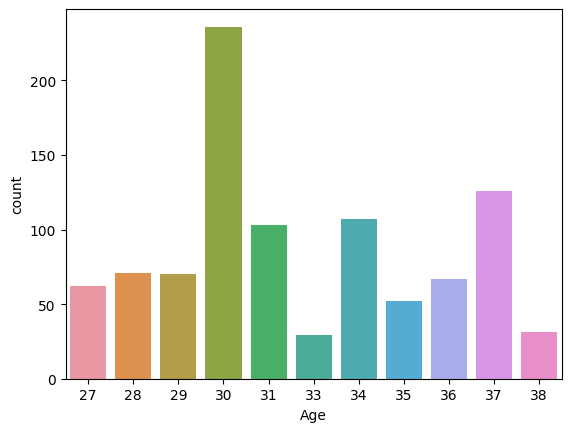

In [ ]:
sns.countplot(data = df, x = 'Age')


 We can see that the most travelers are of age 30 and 37.

In [ ]:
# Split the numeric and categorical features
num_features = ['Age']
ordinal_features = ['AnnualIncomeClass', 'ServicesOpted']
cat_features = ['FrequentFlyer', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Churn']

<Axes: xlabel='Age', ylabel='count'>

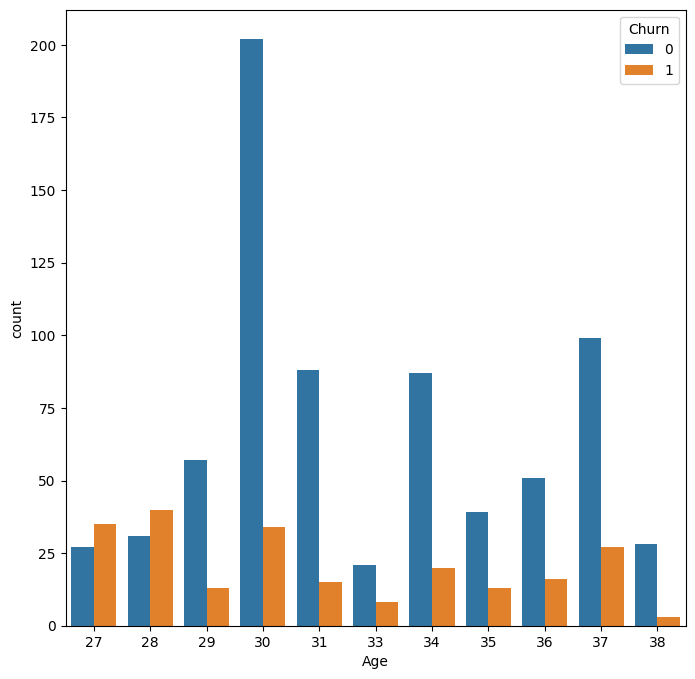

In [ ]:
# plotting the countplot Age Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='Age',hue='Churn',data=df)

<Axes: xlabel='FrequentFlyer', ylabel='count'>

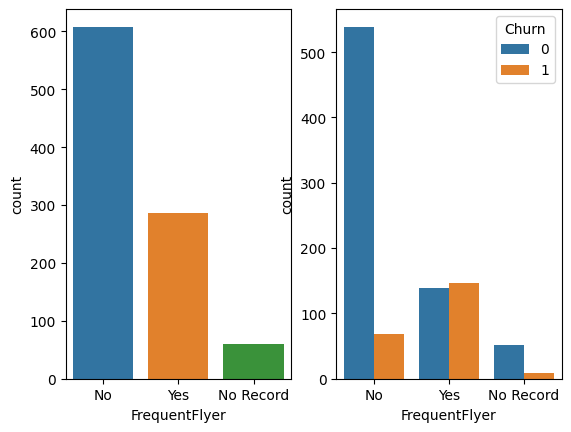

In [ ]:
# Distribution of Frequent Flyer feature

fig,axes = plt.subplots(nrows=1,ncols=2)
sns.countplot(data=df,x='FrequentFlyer',ax=axes[0])
sns.countplot(data=df,x='FrequentFlyer',hue='Churn',ax=axes[1])

We can see that the frequent flyer has the highest churn rate.

<Axes: xlabel='AnnualIncomeClass', ylabel='count'>

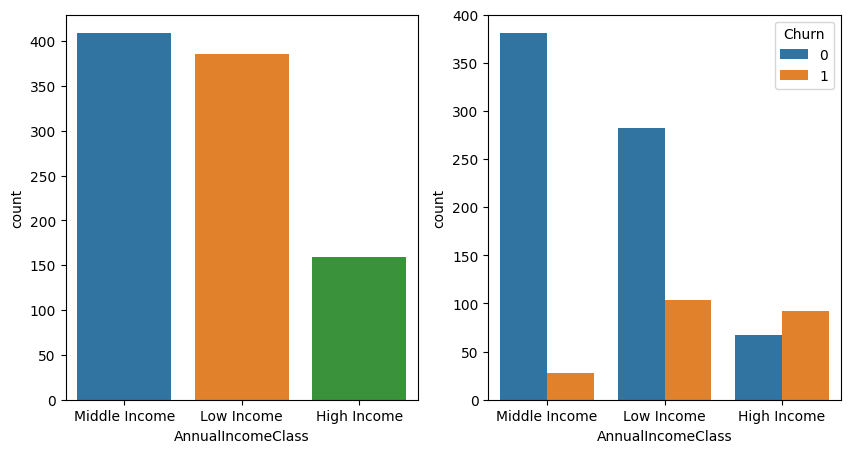

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(data = df, x = 'AnnualIncomeClass',ax=axes[0])
# plotting the countplot AnnualIncomeClass Vs Target
sns.countplot(x='AnnualIncomeClass',hue='Churn',data=df,ax=axes[1])

<Axes: xlabel='ServicesOpted', ylabel='count'>

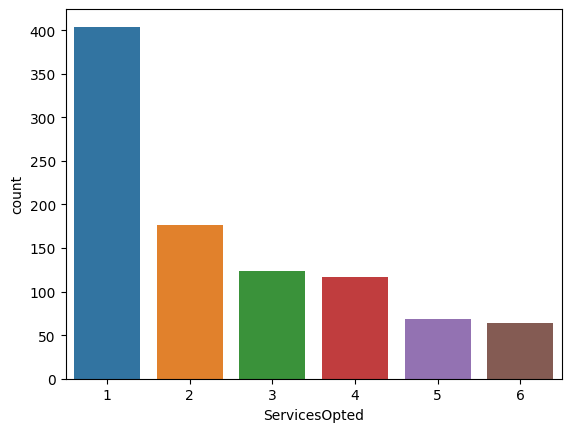

In [ ]:
sns.countplot(data = df, x = 'ServicesOpted')

Most of the people who travels have opted 1 or 2.

<Axes: xlabel='ServicesOpted', ylabel='count'>

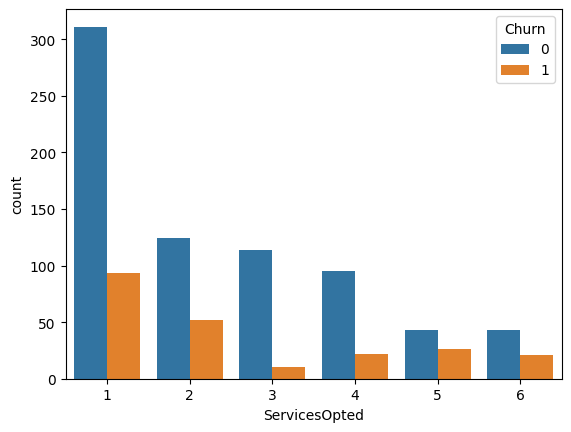

In [ ]:
# plotting the countplot Serviesopted Vs Target

sns.countplot(x='ServicesOpted',hue='Churn',data=df)

Having the 2,5,6 services have high Churn Rate, when compared to others.

<Axes: xlabel='AccountSyncedToSocialMedia', ylabel='count'>

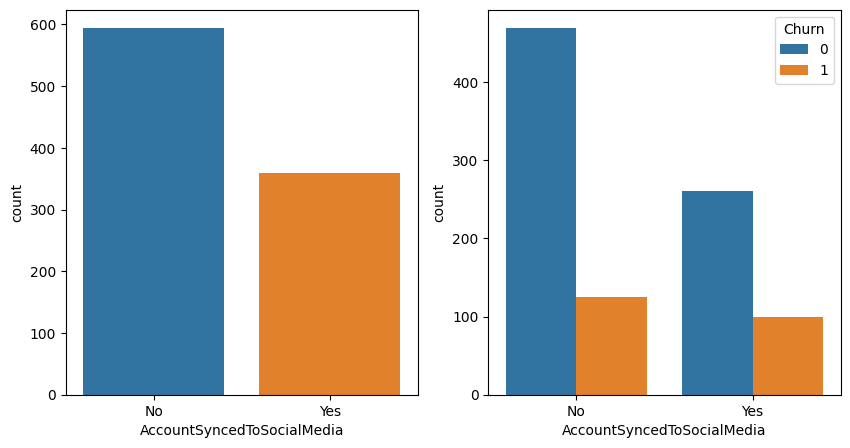

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(data = df, x = 'AccountSyncedToSocialMedia',ax=axes[0])
# plotting the countplot Accountsyncedtosocialmedia Vs Target

sns.countplot(x='AccountSyncedToSocialMedia',hue='Churn',data=df,ax=axes[1])

There are more people that account that is not synced to the social media

<Axes: xlabel='BookedHotelOrNot', ylabel='count'>

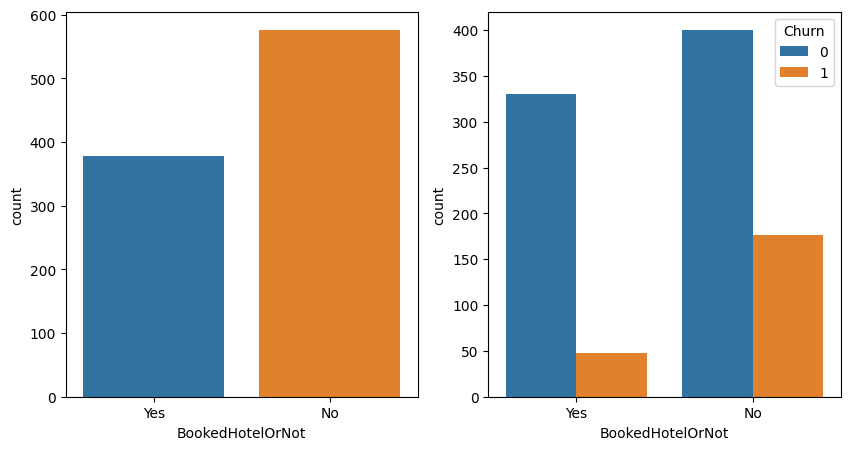

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(data = df, x = 'BookedHotelOrNot',ax=axes[0])
sns.countplot(x='BookedHotelOrNot',hue='Churn',data=df,ax=axes[1])

There are people who didn't book the hotel while they travelling.The people who didn't book the hotel have the high churn rate.



*   **Data Pre-Processing**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


There are some of the objects so we have to make them numeric as machines can understand only numbers.

In [ ]:
le= LabelEncoder()

In [ ]:
df['FrequentFlyer'].value_counts()

No           608
Yes          286
No Record     60
Name: FrequentFlyer, dtype: int64

In [ ]:
df['AnnualIncomeClass'].value_counts()

Middle Income    409
Low Income       386
High Income      159
Name: AnnualIncomeClass, dtype: int64

Here we cannot use Label Encoder in both the above two cases because we have more than two variables, so we use pd.get_dummies method.

In [ ]:
df['AccountSyncedToSocialMedia'].value_counts()

No     594
Yes    360
Name: AccountSyncedToSocialMedia, dtype: int64

Here, we can use Label Encoder, because we have two variables.

In [ ]:
df['AccountSyncedToSocialMedia'] = le.fit_transform(df['AccountSyncedToSocialMedia'])

In [ ]:
df['AccountSyncedToSocialMedia'].value_counts()

0    594
1    360
Name: AccountSyncedToSocialMedia, dtype: int64

In [ ]:
df['BookedHotelOrNot'].value_counts()

No     576
Yes    378
Name: BookedHotelOrNot, dtype: int64

 Here, we can use Label Encoder, because we have two variables.

In [ ]:
df['BookedHotelOrNot'] = le.fit_transform(df['BookedHotelOrNot'])
df['BookedHotelOrNot'].value_counts()

0    576
1    378
Name: BookedHotelOrNot, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns = ['FrequentFlyer','AnnualIncomeClass'])

In [ ]:
df.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,0,1,0,0,0,0,1
1,34,5,1,0,1,0,0,1,0,1,0
2,37,3,1,0,0,1,0,0,0,0,1
3,30,2,0,0,0,1,0,0,0,0,1
4,30,1,0,0,0,1,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              954 non-null    int64
 1   ServicesOpted                    954 non-null    int64
 2   AccountSyncedToSocialMedia       954 non-null    int64
 3   BookedHotelOrNot                 954 non-null    int64
 4   Churn                            954 non-null    int64
 5   FrequentFlyer_No                 954 non-null    uint8
 6   FrequentFlyer_No Record          954 non-null    uint8
 7   FrequentFlyer_Yes                954 non-null    uint8
 8   AnnualIncomeClass_High Income    954 non-null    uint8
 9   AnnualIncomeClass_Low Income     954 non-null    uint8
 10  AnnualIncomeClass_Middle Income  954 non-null    uint8
dtypes: int64(5), uint8(6)
memory usage: 43.0 KB


In [ ]:
df.isnull().sum()

Age                                0
ServicesOpted                      0
AccountSyncedToSocialMedia         0
BookedHotelOrNot                   0
Churn                              0
FrequentFlyer_No                   0
FrequentFlyer_No Record            0
FrequentFlyer_Yes                  0
AnnualIncomeClass_High Income      0
AnnualIncomeClass_Low Income       0
AnnualIncomeClass_Middle Income    0
dtype: int64

<Axes: >

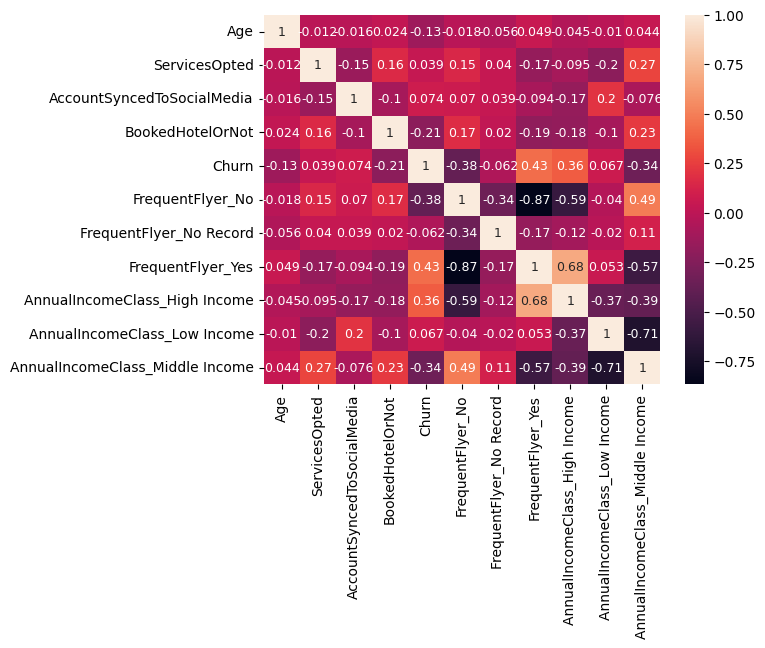

In [ ]:
sns.heatmap(df.corr(), annot = True,annot_kws= {'fontsize':9})

In [ ]:
abs(df.corr()['Churn']).sort_values(ascending=False)

Churn                              1.000000
FrequentFlyer_Yes                  0.430973
FrequentFlyer_No                   0.379391
AnnualIncomeClass_High Income      0.362747
AnnualIncomeClass_Middle Income    0.339959
BookedHotelOrNot                   0.206055
Age                                0.131534
AccountSyncedToSocialMedia         0.073831
AnnualIncomeClass_Low Income       0.067348
FrequentFlyer_No Record            0.062015
ServicesOpted                      0.038646
Name: Churn, dtype: float64

Dataset is ready for Model Building.




1.  **Splitting of the Dataset**




In [ ]:
# Split column to Feature(X) and Target(Y)
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [ ]:
x.columns


Index(['Age', 'ServicesOpted', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'FrequentFlyer_No', 'FrequentFlyer_No Record',
       'FrequentFlyer_Yes', 'AnnualIncomeClass_High Income',
       'AnnualIncomeClass_Low Income', 'AnnualIncomeClass_Middle Income'],
      dtype='object')

In [ ]:
x.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,1,0,0,0,0,1
1,34,5,1,0,0,0,1,0,1,0
2,37,3,1,0,1,0,0,0,0,1
3,30,2,0,0,1,0,0,0,0,1
4,30,1,0,0,1,0,0,0,1,0


In [ ]:
x.shape

(954, 10)

In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int64

In [ ]:
y.shape

(954,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(763, 10)

In [ ]:
x_test.shape

(191, 10)

In [ ]:
y_train.shape

(763,)

In [ ]:
y_test.shape

(191,)



1.   **Modelling**




In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(random_state = 100)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classification', DecisionTreeClassifier(random_state = 100)))
models.append(('Random Forest', RandomForestClassifier(random_state = 100)))

In [ ]:
# evaluate each model in turn
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print("Accuracy of model", msg,end="\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of model Logistic Regression: (0.858639)
Accuracy of model KNN: (0.879581)
Accuracy of model Decision Tree Classification: (0.905759)
Accuracy of model Random Forest: (0.884817)




1.   **LOGISTIC REGRESSION**



In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8586387434554974


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


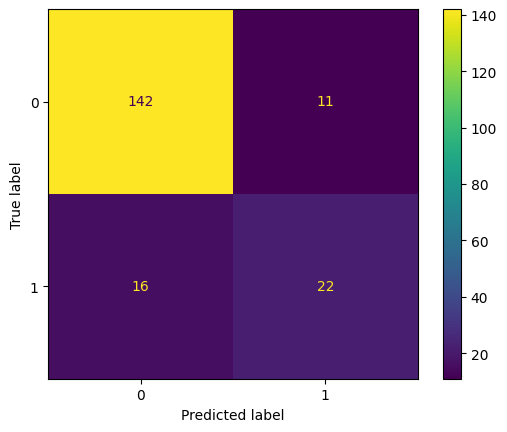

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       153
           1       0.67      0.58      0.62        38

    accuracy                           0.86       191
   macro avg       0.78      0.75      0.77       191
weighted avg       0.85      0.86      0.85       191



Logistic Regression model have precision of almost 67%.



2. **K-Nearest Neighbor(KNN)**


In [ ]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8795811518324608


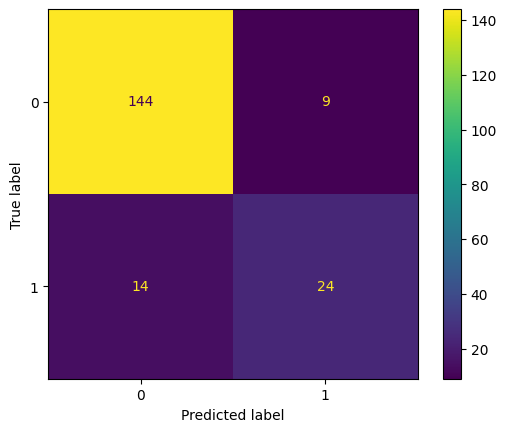

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       153
           1       0.73      0.63      0.68        38

    accuracy                           0.88       191
   macro avg       0.82      0.79      0.80       191
weighted avg       0.87      0.88      0.88       191



K-Nearest Neighbor(KNN) have precision of 73%.

3. **Decision Trees**

In [ ]:
model = DecisionTreeClassifier(random_state=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9057591623036649


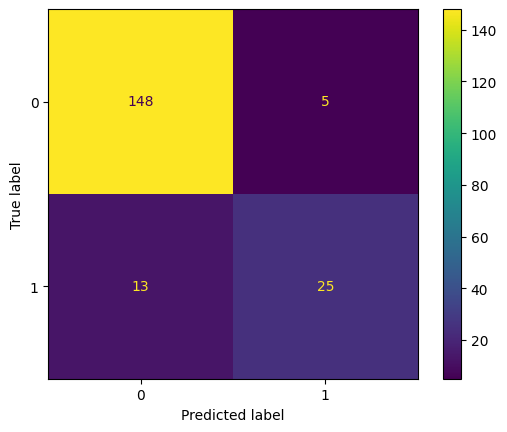

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       153
           1       0.83      0.66      0.74        38

    accuracy                           0.91       191
   macro avg       0.88      0.81      0.84       191
weighted avg       0.90      0.91      0.90       191



Decision Tree classifier has precision of 83%.

4. **Random Forest Classification**

In [ ]:
model = RandomForestClassifier(random_state=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8848167539267016


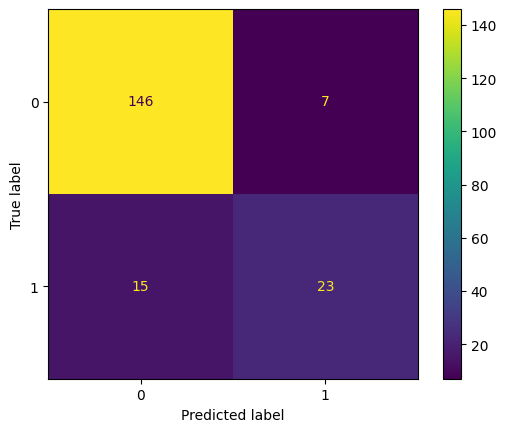

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       153
           1       0.77      0.61      0.68        38

    accuracy                           0.88       191
   macro avg       0.84      0.78      0.80       191
weighted avg       0.88      0.88      0.88       191



Random Forest Classifier has precision of about 77%.



---
Hence ,we can say that the Decision Tree classifier is the best fitted model for our dataset.






*   **Feature analysis**

In [ ]:
models2 = []
models2.append(('DecisionTree', DecisionTreeClassifier(random_state = 42)))
models2.append(('RF', RandomForestClassifier( random_state = 42)))

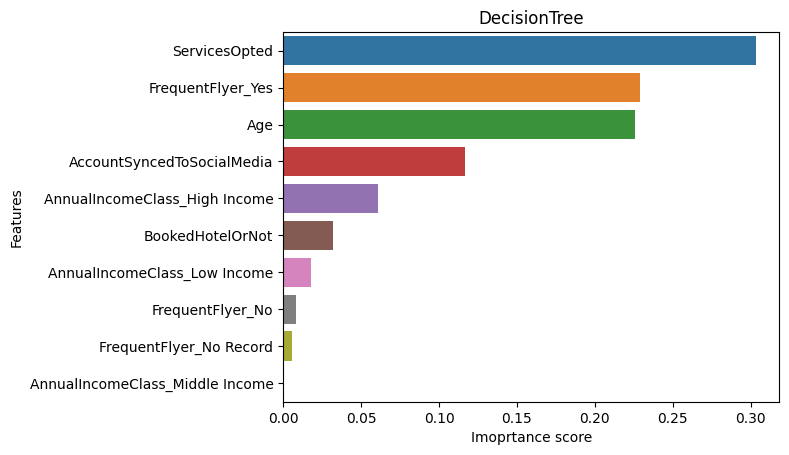

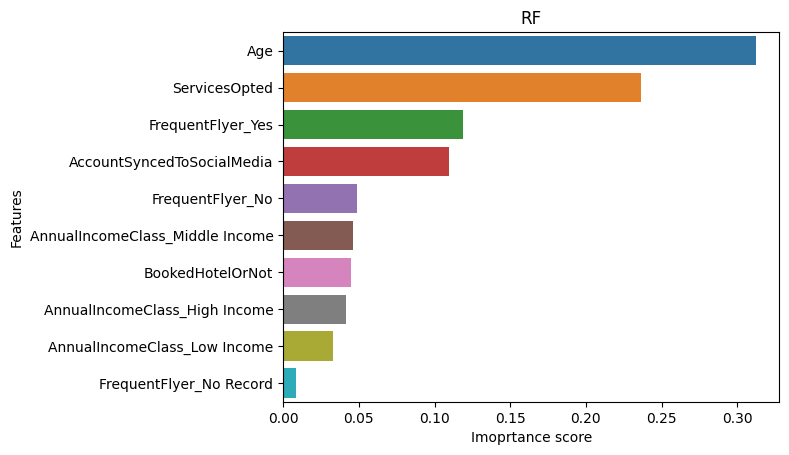

In [ ]:
for name, model in models2:
        base = model.fit(x_train,y_train)
        y_pred = base.predict(x_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=x.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Imoprtance score')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

**Conclusion**:
1. Frequent Flyer status has the highest correlation to whether or not the customer churns.

2. Being a frequent flyer and having high income are the two significant features where Churn exceeds Non-Churn. Intuitively, this makes sense. Someone with more money and who flys a lot is more likely to experiment with different travel companies if they have to travel a lot.

3. 27 and 28 year olds churn more than any other age group.

4. People who don't book hotels churn more than those who do, and intuitively this just makes sense.

5. Middle income people and churn are in negative correlation, low income people and churn are in both positive and negative, and high income people and churn are in positive correlation.

6. People whose number of times services opted during recent years is 'one' and churn are in negative correlation. On the other hand, 'two' ,'five' and 'six'and churn are in positive correlation.

7. Account syncing to social media and churn are both in positive and negative. It means that both side are using social media.




---
As a result, to prevent churn, especially, I have to take care of people who are 27 to 28 years old, or/and who have frequent flight or/and two, five or six times services opted during recent years or/and are with high income, or/and who do not book the hotel.



